<a href="https://colab.research.google.com/github/LindseyShantanu/AI-ML-Dev/blob/main/Building%20a%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()
sns.set_style('darkgrid')

In [2]:
mnist = tf.keras.datasets.mnist
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()
train_data, test_data = train_data / 255.0, test_data / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [22]:
#define our network with nueral information
#layers create thresholds to parse data and push into the next layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [4]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [23]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [24]:
history = model.fit(train_data, train_targets, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2846 - accuracy: 0.9167
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1338 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0986 - accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0803 - accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0672 - accuracy: 0.9788


In [25]:
model.evaluate(test_data, test_targets, verbose=2)

313/313 - 1s - loss: 0.0780 - accuracy: 0.9755 - 1s/epoch - 3ms/step


[0.07798463851213455, 0.9754999876022339]

Text(0.5, 1.0, 'Loss')

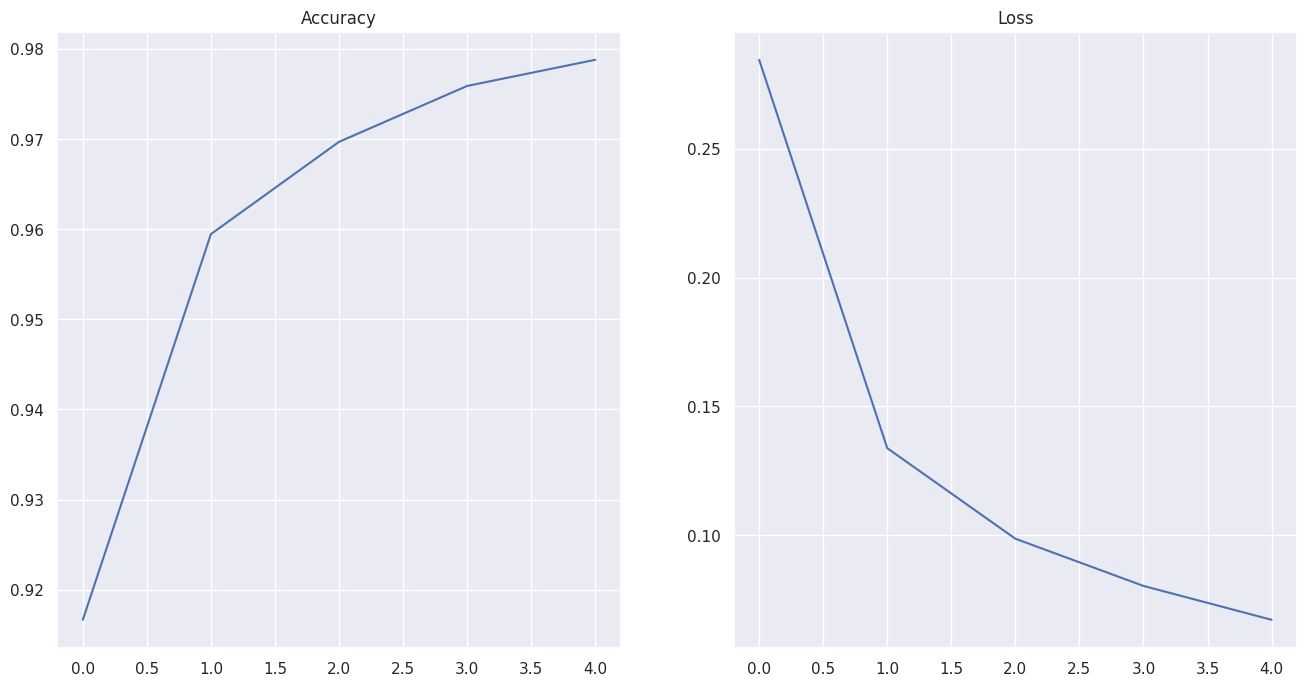

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].plot(history.history['accuracy'])
ax[0].set_title('Accuracy')
ax[1].plot(history.history['loss'])
ax[1].set_title('Loss')

313/313 [==============================] - 1s 2ms/step


Text(93.75, 0.5, 'Predicted')

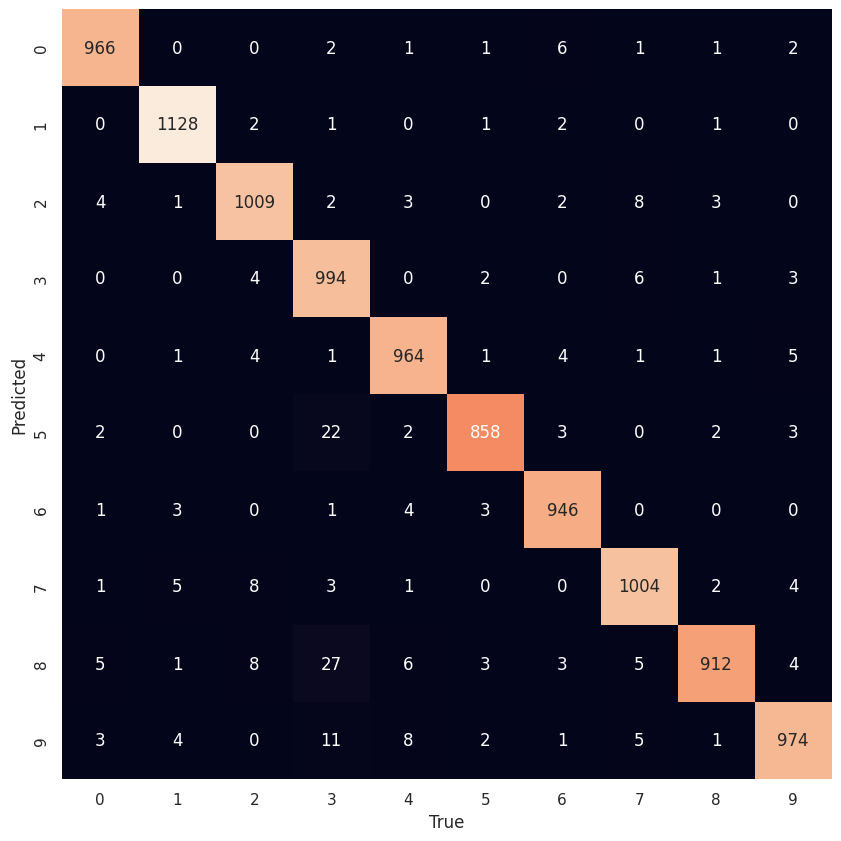

In [27]:
p = model.predict(test_data)
p = tf.constant(p)
p = np.round(p.numpy(), 3)
p = tf.math.argmax(p, axis=1)

c = tf.math.confusion_matrix(test_targets, p)
plt.figure(figsize=(10,10))
ax = sns.heatmap(c, square=True, annot=True, fmt='d', cbar=False)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')